# Segmentation Using Color Spaces

#### Color Spaces and Reading Images in OpenCV

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

import cv2

import os
print(os.listdir("input"))

['.DS_Store', 'test', 'train', 'train.csv', 'sample_submission.csv']


In [2]:
img_path='input/train'
whale_image_list=os.listdir(img_path)
whale_image_list

['000f0f2bf.jpg',
 '00029d126.jpg',
 '0000e88ab.jpg',
 '0005c1ef8.jpg',
 '001cae55b.jpg',
 '000a6daec.jpg',
 '001c1ac5f.jpg',
 '0016b897a.jpg',
 '00050a15a.jpg',
 '0006e997e.jpg',
 '0001f9222.jpg']

In [3]:
# Look at all the color space conversions OpenCV provides
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
len(flags)
flags[30:40]

['COLOR_BAYER_GBRG2BGR_VNG',
 'COLOR_BAYER_GBRG2GRAY',
 'COLOR_BAYER_GBRG2RGB',
 'COLOR_BAYER_GBRG2RGBA',
 'COLOR_BAYER_GBRG2RGB_EA',
 'COLOR_BAYER_GBRG2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG']

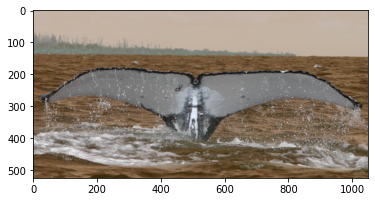

In [4]:
# Load an Image
whale = cv2.imread(img_path+'/'+whale_image_list[8])
plt.imshow(whale)
plt.show()

In [5]:
# change color-space

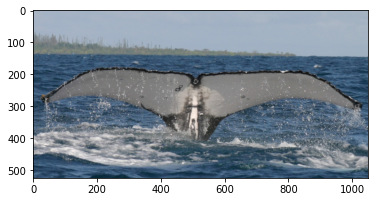

In [6]:
# Convert from BGR to RGB color-space
whale_rgb = cv2.cvtColor(whale, cv2.COLOR_BGR2RGB)
plt.imshow(whale_rgb)
plt.show()

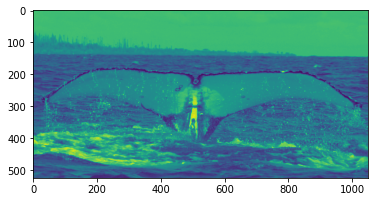

In [7]:
# Convert from BGR to GRAY color-space
whale_gray = cv2.cvtColor(whale, cv2.COLOR_BGR2GRAY)
plt.imshow(whale_gray)
plt.show()

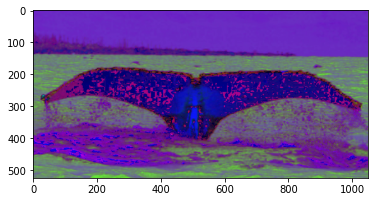

In [8]:
# Convert from BGR to HSV color-space
whale_hsv = cv2.cvtColor(whale, cv2.COLOR_BGR2HSV)
plt.imshow(whale_hsv)
plt.show()

In [9]:
# Separate the channels of an RGB image

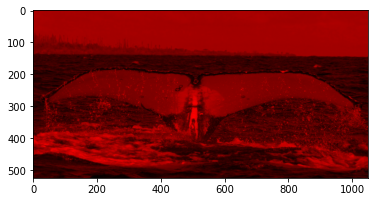

In [10]:
# R channel
red = whale_rgb.copy()
# set blue and green channels to 0
red[:, :, 1] = 0
red[:, :, 2] = 0
# RGB - Red
plt.imshow(red)
plt.show()

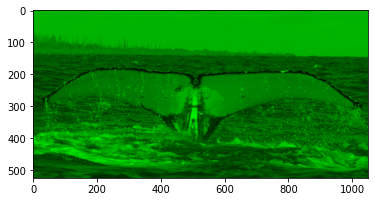

In [11]:
# G channel
green = whale_rgb.copy()
# set blue and red channels to 0
green[:, :, 0] = 0
green[:, :, 2] = 0
# RGB - Green
plt.imshow(green)
plt.show()

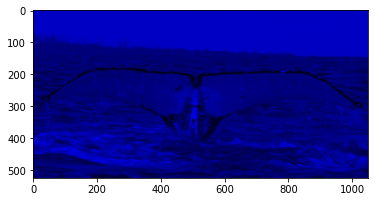

In [12]:
# B channel
blue = whale_rgb.copy()
# set green and red channels to 0
blue[:, :, 0] = 0
blue[:, :, 1] = 0
# RGB - Blue
plt.imshow(blue)
plt.show()

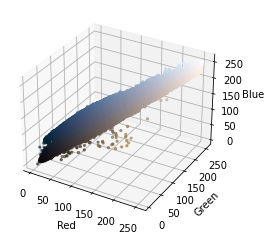

In [13]:
# Visualizing Whale in RGB Color Space
r, g, b = cv2.split(whale_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = whale_rgb.reshape((np.shape(whale_rgb)[0]*np.shape(whale_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

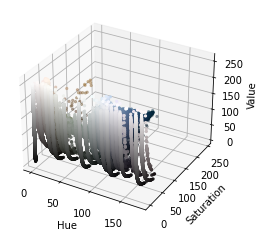

In [14]:
# Visualizing Whale in HSV Color Space
h, s, v = cv2.split(whale_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [15]:
# Picking Out a Range
# Let’s threshold whale just based on a simple range of blues.

In [16]:
# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

In [17]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

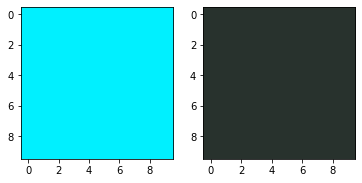

In [18]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [19]:
''' use cv2.inRange() to try to threshold Whale. inRange() takes three parameters: the image, the lower range, and the 
higher range. It returns a binary mask (an ndarray of 1s and 0s) the size of the image where values of 1 indicate 
values within the range, and zero values indicate values outside:'''

' use cv2.inRange() to try to threshold Whale. inRange() takes three parameters: the image, the lower range, and the \nhigher range. It returns a binary mask (an ndarray of 1s and 0s) the size of the image where values of 1 indicate \nvalues within the range, and zero values indicate values outside:'

In [20]:
mask = cv2.inRange(whale_hsv, lower_blue, upper_blue)

In [21]:
result = cv2.bitwise_and(whale_rgb, whale_rgb, mask=mask)

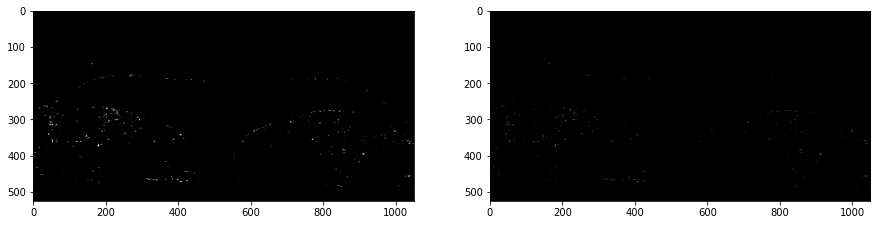

In [22]:
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [23]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

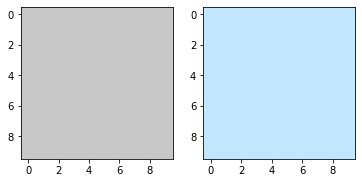

In [24]:
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

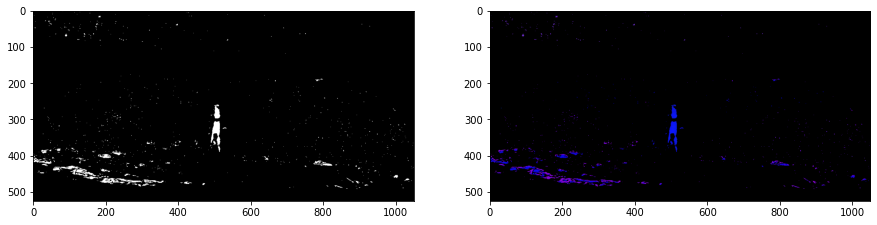

In [25]:
mask_white = cv2.inRange(whale_hsv, light_white, dark_white)
result_white = cv2.bitwise_and(whale_hsv, whale_hsv, mask=mask_white)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

In [26]:
#  combine the masks

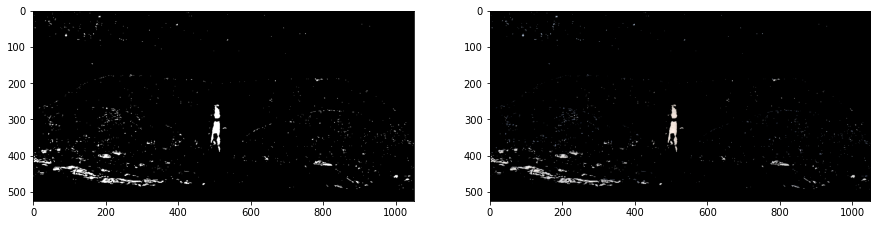

In [27]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(whale_rgb, whale_rgb, mask=final_mask)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [28]:
''' Apply Gaussian blur
A Gaussian blur is an image filter that uses a kind of function called a Gaussian to transform each pixel in the 
image. It has the result of smoothing out image noise and reducing detail.'''

' Apply Gaussian blur\nA Gaussian blur is an image filter that uses a kind of function called a Gaussian to transform each pixel in the \nimage. It has the result of smoothing out image noise and reducing detail.'

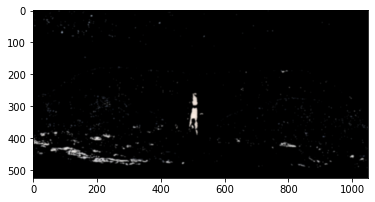

In [29]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

#### Segmentation Generalize to Whale’s Relatives

In [30]:
whales_friends = []
for whale in whale_image_list[:10]:
   friend = cv2.cvtColor(cv2.imread(img_path +'/'+ whale), cv2.COLOR_BGR2RGB)
   whales_friends.append(friend)

In [31]:
def segment_whale(image):
    ''' Attempts to segment the whale out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Set the blue range
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Apply the blue mask 
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

    # Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Apply the white mask
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur


In [32]:
results = [segment_whale(whale) for whale in whales_friends]

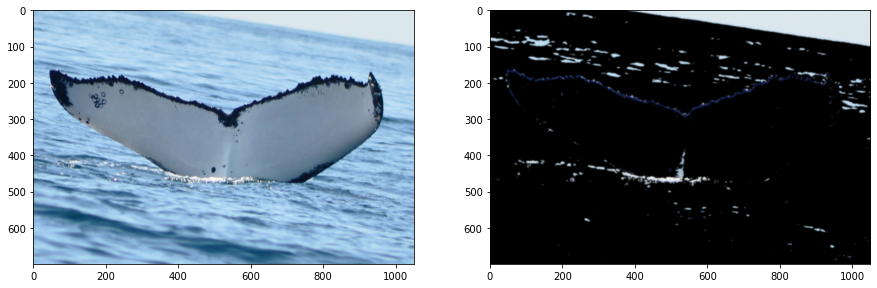

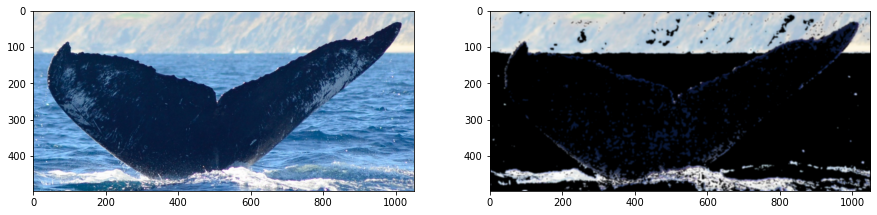

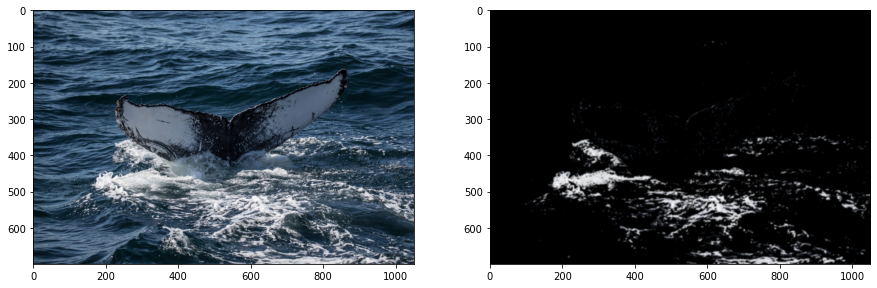

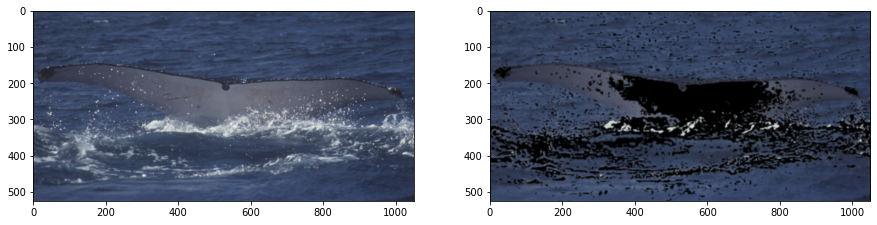

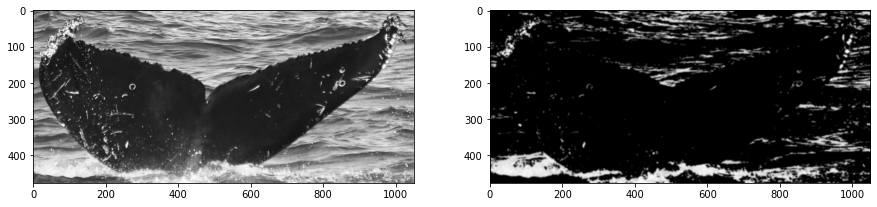

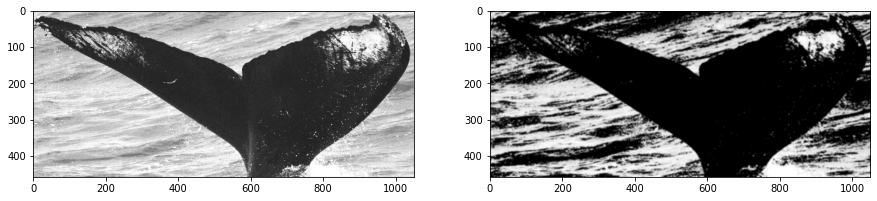

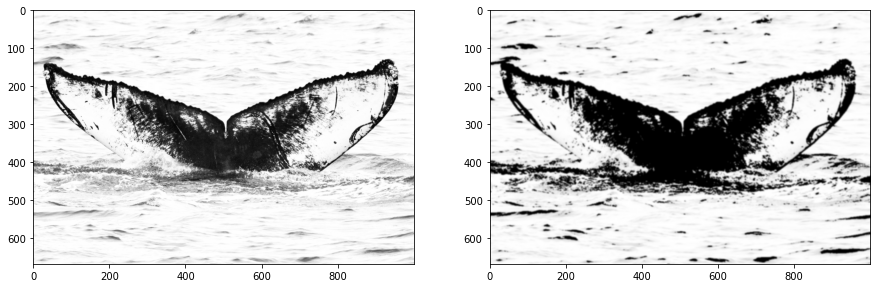

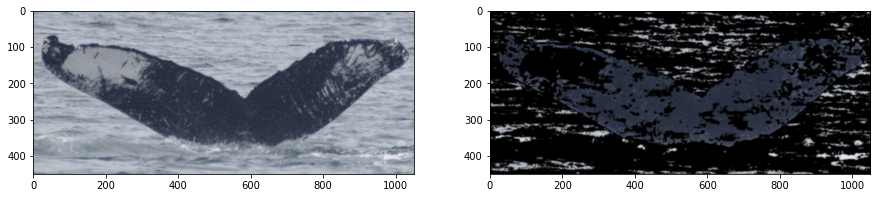

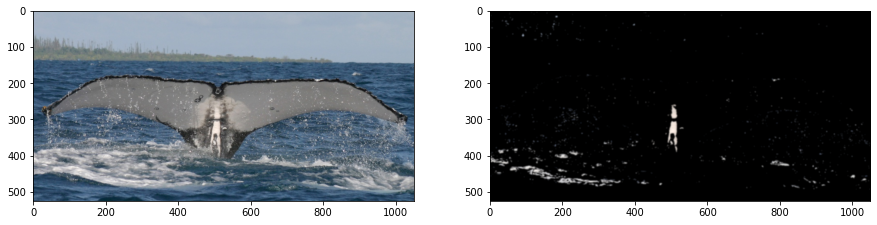

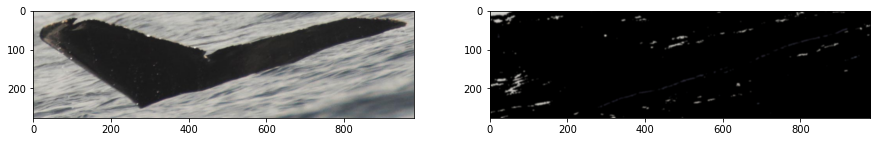

In [33]:
for i in range(10):
    plt.figure(figsize=(15,20))
    plt.subplot(1, 2, 1)
    plt.imshow(whales_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()